# NLP Problem

## Clean the data

Import required libraries for read and clean the data 

In [9]:
import numpy as np
import pandas as pd
import nltk
from nltk import FreqDist
import re

from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

Understand the training data

In [10]:
# Use pandas to read csv file
train_data = pd.read_csv('data/V1.4_Training.csv', names= ['id', 'sentence', 'prediction'])
train_data.head()

,id,sentence,prediction
0,663_3,"""Please enable removing language code from the...",1
1,663_4,"""Note: in your .csproj file, there is a Suppor...",0
2,664_1,"""Wich means the new version not fully replaced...",0
3,664_2,"""Some of my users will still receive the old x...",0
4,664_3,"""The store randomly gives the old xap or the n...",0


Function to findout the most frequent terms in the given data

In [11]:
# Function to plot most frequent terms
def freq_words(x):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # Select top 20 most frequent words
    d = words_df.nlargest(columns="count", n = 20) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

Plot the most frequently used terms

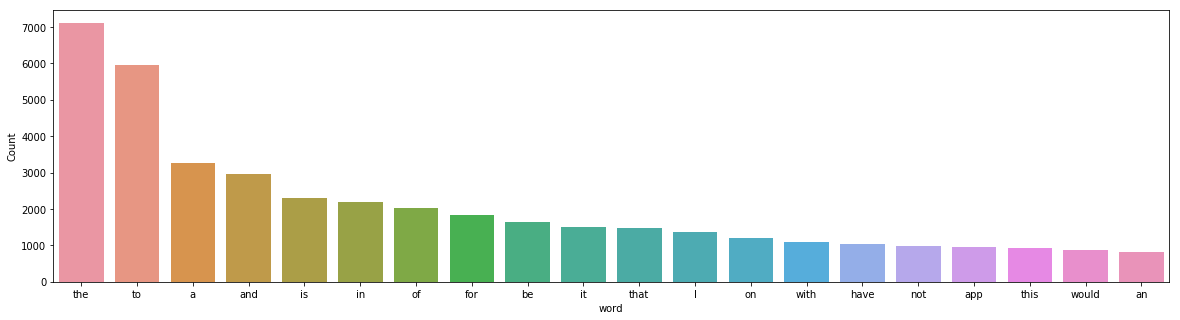

In [12]:
freq_words(train_data['sentence'])

<b>We can see that the most frequently used words are some useless terms which are called the stop words.</b>

Define unwanted symbols and stop words

In [13]:
# Define unwanted characters, numbers and symbols
rep_sym = re.compile('[/(){}\[\]\|@,;]')
rep_unw_sym = re.compile('[^0-9a-z #+_]')
stop_words = set(stopwords.words('english'))

train_data['sentence'] = train_data['sentence'].str.replace("[^a-zA-Z#]", " ")

Function to clean the text: ( Make the text to lower case, Remove Unwanted Symbols, Remove stop words )

In [14]:
# Function to clean text
def clean_text(text):
    
    # Change all text to lower to avoid ambiguity
    text = text.lower()
    
    # Replace all unwanted symbols by space in text
    text = rep_sym.sub(' ', text) 
    text = rep_unw_sym.sub('', text)
    
    # Remove stopwords from the sentences
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

Clean the text in the training data

In [15]:
train_data['sentence'] = train_data['sentence'].apply(clean_text)

# The total number of effective words which we will train the model on
train_data['sentence'].apply(lambda x: len(x.split(' '))).sum()

86076

## Train different models for prediction

Import the required libraries for training the model and evaluating it

In [17]:
# Library to split the training data to train and test data
from sklearn.model_selection import train_test_split

# Library to convert the text into a matrix of TF-IDF and token count.
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

# Library to apply a pipeline of functions
from sklearn.pipeline import Pipeline

# Libraries to perform Learning on the data
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Library to evaluate the model predictions
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

Split the training data to 75:25 ratio of train and test data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(train_data.sentence,
                                                    train_data.prediction,
                                                    test_size=0.25,
                                                    random_state = 42)
# Random state to pick data randomly into train and test data (Can take any value)

<b>Train a Naïve Bayes Model on training data</b>

Pipeline of activities to first create a matrix with TF-IDF and count token values and later create a Naïve Bayes model based on it.

In [19]:
# Create the pipeline
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB())])

# Fit the training data on the model
nb.fit(X_train, y_train)

# Predict the labels for the test data split using train test split
y_pred = nb.predict(X_test)         

# Evaluate the results
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.7698823529411765
             precision    recall  f1-score   support

          0       0.77      0.99      0.87      1617
          1       0.76      0.06      0.10       508

avg / total       0.77      0.77      0.69      2125



<b> We have obtained an accuracy of 77% </b>

<b>Train a Linear Support Vector Machine Model on training data</b>

Pipeline of activities to first create a matrix with TF-IDF and count token values and later create a Linear Support Vector Machine model based on it.

In [20]:
# Create the pipeline
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None))])


# Fit the training data on the model
sgd.fit(X_train, y_train)

# Predict the labels for the test data split using train test split
y_pred = sgd.predict(X_test)

# Evaluate the results
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.8004705882352942
             precision    recall  f1-score   support

          0       0.80      0.99      0.88      1617
          1       0.83      0.21      0.33       508

avg / total       0.81      0.80      0.75      2125



<b> We have obtained an accuracy of 80% </b>

<b>Train a Logistic Regression Model on training data</b>

Pipeline of activities to first create a matrix with TF-IDF and count token values and later create a Logistic Regression model based on it.

In [21]:
# Create the pipeline
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5))])

# Fit the training data on the model
logreg.fit(X_train, y_train)

# Predict the labels for the test data split using train test split
y_pred = logreg.predict(X_test)

# Evaluate the results
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.7830588235294118
             precision    recall  f1-score   support

          0       0.85      0.87      0.86      1617
          1       0.55      0.51      0.53       508

avg / total       0.78      0.78      0.78      2125



<b> We have obtained an accuracy of 78.3% </b>

<b>Train a Random Forest Classifier Model on training data</b>

Pipeline of activities to first create a matrix with TF-IDF and count token values and later create a Random Forest Classifier model based on it.

In [22]:
# Create the pipeline
rfc = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(n_estimators=100))])

# Fit the training data on the model
rfc.fit(X_train, y_train)

# Predict the labels for the test data split using train test split
y_pred = rfc.predict(X_test)

# Evaluate the results
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.8414117647058823
             precision    recall  f1-score   support

          0       0.85      0.96      0.90      1617
          1       0.79      0.45      0.58       508

avg / total       0.84      0.84      0.82      2125



<b> We have obtained an accuracy of 84% </b>

We can see that our Random Forest Classifier Model gives better results

Import the test data

In [23]:
# The test data needs a 'ISO-8859-1' encoding
label_test_train = pd.read_csv('data/SubtaskA_Trial_Test_Labeled.csv',encoding = "ISO-8859-1",names = ['id', 'sentence', 'prediction'], skiprows = 1)
unlab_test_train = pd.read_csv('data/SubtaskA_Trial_Test.csv',names = ['id', 'sentence', 'prediction'])

In [24]:
# Understand the test data
unlab_test_train.head()

,id,sentence,prediction
0,13101,"""I'm not asking Microsoft to Gives permission ...",X
1,13121,"""somewhere between Android and iPhone.""",X
2,13131,"""And in the Windows Store you can flag the App...",X
3,13132,"""Many thanks Sameh Hi, As we know, there is a ...",X
4,13133,"""The idea is that we can develop a regular app...",X


Clean the test data as we need the test data to be in the same format as the train data

In [25]:
unlab_test_train['sentence'] = unlab_test_train['sentence'].apply(clean_text)

<b> Verify the results over different models trained </b>

<b>Predicting the results over Random Forest Classifier</b>

In [26]:
# Use Random Forest Classifier model to predict the labels for test data
y_pred = rfc.predict(unlab_test_train.sentence)

# Evaluate the results obtained
print('accuracy %s' % accuracy_score(y_pred, label_test_train.prediction))
print(classification_report(label_test_train.prediction, y_pred))

accuracy 0.6486486486486487
             precision    recall  f1-score   support

          0       0.60      0.92      0.72       296
          1       0.83      0.38      0.52       296

avg / total       0.71      0.65      0.62       592



<b> We have obtained an accuracy of 65% </b>

<b>Predicting the results over Linear Support Vector Machine</b>

In [27]:
# Use Linear Support Vector Machine model to predict the labels for test data
y_pred = sgd.predict(unlab_test_train.sentence)

# Evaluate the results obtained
print('accuracy %s' % accuracy_score(y_pred, label_test_train.prediction))
print(classification_report(label_test_train.prediction, y_pred))

accuracy 0.5557432432432432
             precision    recall  f1-score   support

          0       0.53      0.97      0.69       296
          1       0.84      0.14      0.24       296

avg / total       0.68      0.56      0.46       592



<b> We have obtained an accuracy of 55.6% </b>

<b>Predicting the results over Naïve Bayes</b>

In [28]:
# Use Naïve Bayes model to predict the labels for test data
y_pred = nb.predict(unlab_test_train.sentence)         

# Evaluate the results obtained
print('accuracy %s' % accuracy_score(y_pred, label_test_train.prediction))
print(classification_report(label_test_train.prediction, y_pred))

accuracy 0.5084459459459459
             precision    recall  f1-score   support

          0       0.50      1.00      0.67       296
          1       1.00      0.02      0.03       296

avg / total       0.75      0.51      0.35       592



<b> We have obtained an accuracy of 50.5% </b>

<b>Predicting the results over Logistic Regression</b>

In [29]:
# Use Logistic Regression model to predict the labels for test data
y_pred = logreg.predict(unlab_test_train.sentence)

# Evaluate the results obtained
print('accuracy %s' % accuracy_score(y_pred, label_test_train.prediction))
print(classification_report(label_test_train.prediction, y_pred))

accuracy 0.5726351351351351
             precision    recall  f1-score   support

          0       0.55      0.78      0.65       296
          1       0.62      0.36      0.46       296

avg / total       0.59      0.57      0.55       592



<b> We have obtained an accuracy of 57.3% </b>

We see that Random Forest Classifier model still performs better than the rest. So we use this model for the final prediction.

## Predict over the Evaluation test data

Import the final test data for which labels has to be predicted

In [30]:
# Import the final test data to predict the labels
evaluation_data = pd.read_csv('data/SubtaskA_EvaluationData.csv', names = ['id', 'sentence', 'prediction'])
evaluation_data.head()

,id,sentence,prediction
0,9566,This would enable live traffic aware apps.,X
1,9569,Please try other formatting like bold italics ...,X
2,9576,Since computers were invented to save time I s...,X
3,9577,Allow rearranging if the user wants to change ...,X
4,9579,Add SIMD instructions for better use of ARM NE...,X


Predict the labels using Random Forest Classifier model trained before

In [31]:
# Predict labels using Random Forest Classifier model
y_pred = rfc.predict(evaluation_data.sentence)

# Set the value of label in place of X in data frame
for index in range(evaluation_data.shape[0]):
    evaluation_data.at[index, 'prediction'] = y_pred[index]
    
# Sample 20 random entries from the data frame
evaluation_data.sample(20)

,id,sentence,prediction
757,6084,I think its a bug.,0
647,5730,The first problem that we encountred is that i...,0
44,10297,I would be a really nice gesture to have an op...,1
803,6233,Other strange differences did show up as well ...,0
589,5562,This is a big drawback.,0
674,5780,This solution is quite hacky and a lot of work,0
641,5716,More like angularJs style.,0
816,6291,In Silverlight it was once possible to registe...,0
272,4711,But it has no similar property on UWP's api.,0
233,4608,*At this point a perpetrator is able to take t...,0


Save the data to .csv file

In [32]:
# Save the data to .csv file and removing header and index
evaluation_data.to_csv('hari_sai_raghuram_veeramallu.csv', sep=',', header = None, index = False)